#### Train a tomato leaf disease classification model using the code provided in training with the PlantVillage dataset (using only tomato leaf images). Then, implement a method to first identify whether an image is a tomato or non-tomato leaf before performing disease classification. Modify the backend/model to return "Non-tomato leaf" if the input is not a tomato leaf image.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Training the Tomato V Non-Tomato CNN Model

This CNN will classify whether an image is a tomato leaf or not

```
/dataset_tomato_vs_nontomato
  ├── tomato_leaves/
  │   ├── tomato1.jpg
  │   ├── tomato2.jpg
  ├── non_tomato_leaves/
  │   ├── potato1.jpg
  │   ├── pepper1.jpg
```


In [38]:
IMG_SIZE = 128

EPOCHS = 10
DROPOUT_RATE = 0.5

TOMATO_DISEASE_DATASET = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\tomato-leaf-disease-classification\dataset_tomato_diseases"
TOMATO_VS_NON_TOMATO_DATASET = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\tomato-leaf-disease-classification\dataset_tomato_vs_non_tomato"

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(DROPOUT_RATE),

    # binary classification - tomato or not
    Dense(1, activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=30,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True  
)

train_data = datagen.flow_from_directory(
    TOMATO_VS_NON_TOMATO_DATASET,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = "binary",
    subset = "training"
)

val_data = datagen.flow_from_directory(
    TOMATO_VS_NON_TOMATO_DATASET,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)

# model training
tomato_vs_nontomato_model_history = model.fit(train_data, validation_data=val_data, epochs = EPOCHS)

# saving the model for later use
model.save("tomato_vs_nontomato_cnn.keras")

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


c:\Users\CompUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\CompUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 486ms/step - accuracy: 0.5313 - loss: 0.8514 - val_accuracy: 0.7950 - val_loss: 0.5184
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 317ms/step - accuracy: 0.7909 - loss: 0.4960 - val_accuracy: 0.8450 - val_loss: 0.3681
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 285ms/step - accuracy: 0.8641 - loss: 0.3450 - val_accuracy: 0.8425 - val_loss: 0.3337
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 307ms/step - accuracy: 0.8534 - loss: 0.3563 - val_accuracy: 0.8625 - val_loss: 0.3175
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 288ms/step - accuracy: 0.8808 - loss: 0.2907 - val_accuracy: 0.8775 - val_loss: 0.2854
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.8966 - loss: 0.2576 - val_accuracy: 0.8400 - val_loss: 0.4159
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 310ms/step - accuracy: 0.9035 - loss: 0.2495 - val_accuracy: 0.8475 - val_loss: 0.3639
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 289ms/step - accuracy: 0.8866 - loss: 0.3028 - val_accu

### CNN-Based Tomato Disease Classifier

```
/dataset_tomato_diseases
  ├── Tomato_Bacterial_spot/
  ├── Tomato_Early_blight/
  ├── Tomato_Late_blight/
  ├── Tomato_Leaf_Mold/
```

In [39]:
# CNN architecture definiton
disease_model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),

    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(10, activation = "softmax")
])

# model compilation
disease_model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

# loading the dataset
datagen = ImageDataGenerator(
    rescale = 1.0 / 255,
    validation_split = 0.2
)

train_data = datagen.flow_from_directory(
    TOMATO_DISEASE_DATASET,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = "categorical",
    subset = "training"
)

val_data = datagen.flow_from_directory(
    TOMATO_DISEASE_DATASET,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = "categorical",
    subset = "validation"
)

# model training
tomato_disease_model_history = disease_model.fit(
    train_data,
    validation_data = val_data,
    epochs = EPOCHS
)

# saving the model for later use
disease_model.save("tomato_disease_cnn.keras")

Found 12813 images belonging to 10 classes.
Found 3198 images belonging to 10 classes.
Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 169s 416ms/step - accuracy: 0.4862 - loss: 1.4653 - val_accuracy: 0.8177 - val_loss: 0.5485
Epoch 2/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 108s 270ms/step - accuracy: 0.8017 - loss: 0.5729 - val_accuracy: 0.8415 - val_loss: 0.4593
Epoch 3/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 146s 363ms/step - accuracy: 0.8619 - loss: 0.4022 - val_accuracy: 0.9040 - val_loss: 0.2852
Epoch 4/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 145s 361ms/step - accuracy: 0.8908 - loss: 0.3174 - val_accuracy: 0.9015 - val_loss: 0.2899
Epoch 5/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 133s 331ms/step - accuracy: 0.9164 - loss: 0.2501 - val_accuracy: 0.9021 - val_loss: 0.2920
Epoch 6/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 136s 339ms/step - accuracy: 0.9242 - loss: 0.2247 - val_accuracy: 0.9406 - val_loss: 0.1885
Epoch 7/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 128s 319ms/step - accuracy: 0.9458 - loss: 0.1596 - val_accuracy: 0.8962 - val_lo

### Plotting the training and validation metrics

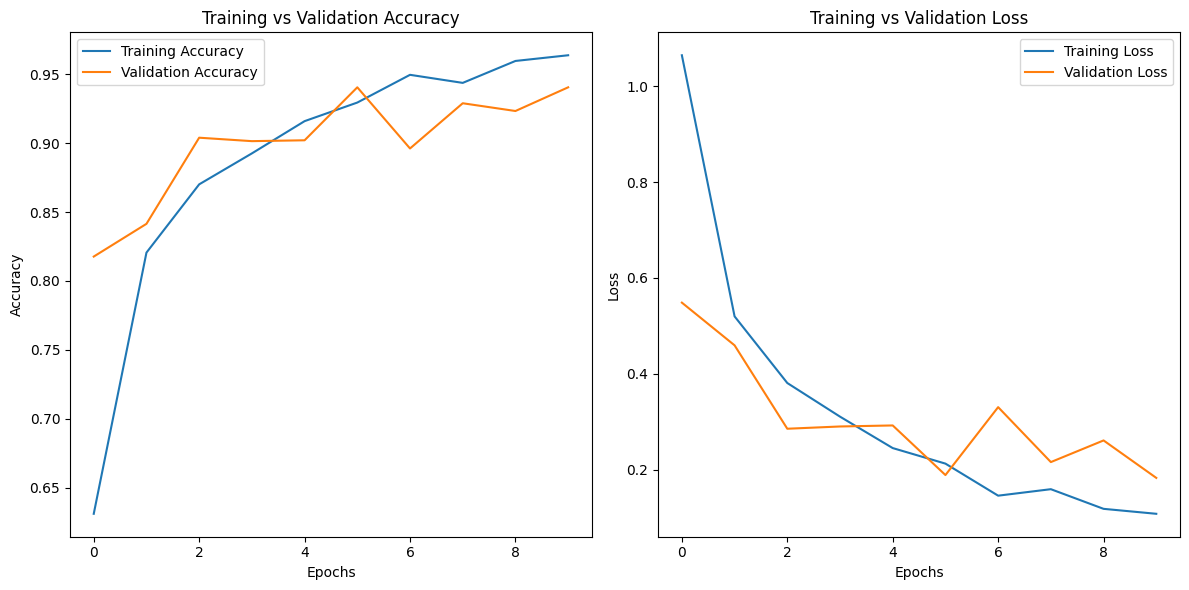

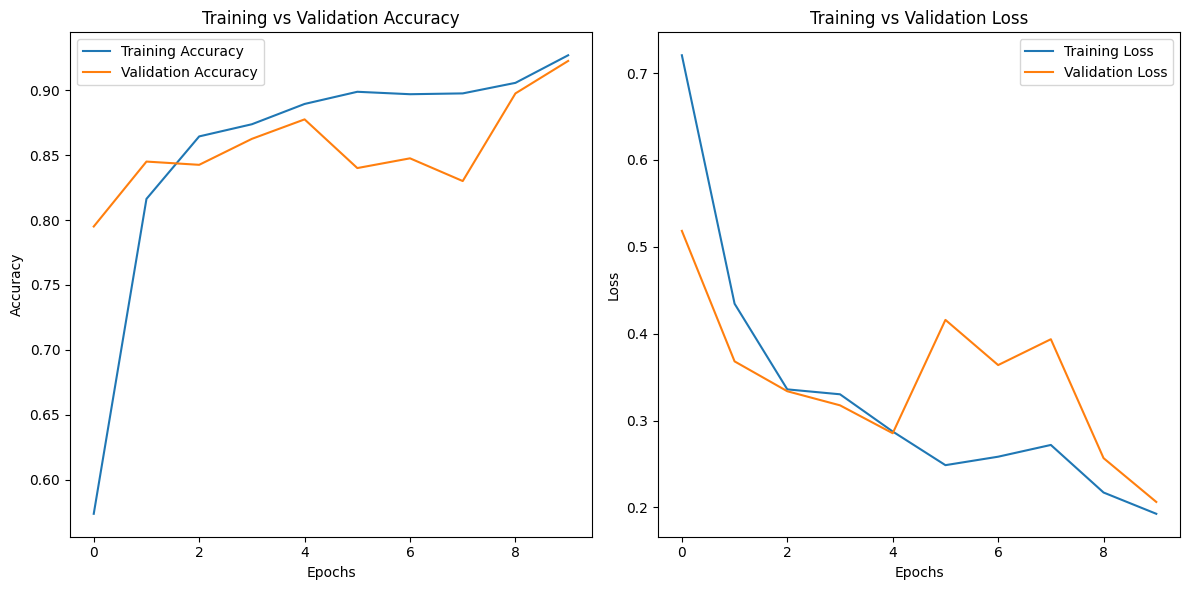

In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

def plot(history: History) -> None:
    # this function that creates a plot to visualize 
    # the training and validation accuracy as well 
    # as the training and validation loss of a machine learning model over epochs. 
    
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(EPOCHS), train_accuracy, label='Training Accuracy')
    plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(EPOCHS), train_loss, label='Training Loss')
    plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot(tomato_disease_model_history)
plot(tomato_vs_nontomato_model_history)

### Develop a Two-Stage Classification Pipeline

Now, we create a function that:

First classifies whether the leaf is a tomato leaf.
If it’s a tomato leaf, classifies the disease.
If not, returns "Non-tomato leaf".

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# loading the models
tomato_vs_nontomato_model = tf.keras.models.load_model("tomato_vs_nontomato_cnn.keras")
disease_model = tf.keras.models.load_model("tomato_disease_cnn.keras")

DISEASE_CLASSES = [
    'Tomato_Bacterial_spot', 
    'Tomato_Early_blight', 
    'Tomato_Late_blight', 
    'Tomato_Leaf_Mold', 
    'Tomato_Septoria_leaf_spot', 
    'Tomato_Spider_mites_Two_spotted_spider_mite', 
    'Tomato__Target_Spot', 
    'Tomato__Tomato_YellowLeaf__Curl_Virus', 
    'Tomato__Tomato_mosaic_virus', 
    'Tomato_healthy'
]

def preprocess_image(img_path: str):
    """
    Preprocessing the image for model prediction
    """

    img = image.load_img(img_path, target_size = (IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array /= 255.0
    return img_array, img

def predict(img_path):
    """ 
    this function takes an image path as input, preprocesses the image, 
    and then makes predictions using two loaded models: 
    `tomato_vs_nontomato_model` and `disease_model`.
    """
    
    # first we make the "tomato v nontomato" classification
    img_array, img = preprocess_image(img_path)
    
    is_tomato = tomato_vs_nontomato_model.predict(img_array)[0][0] > 0.5

    if not is_tomato:
        label = "Non-Tomato Leaf 🍃"
        confidence = None
    else:
        # disease classification
        disease_pred = disease_model.predict(img_array)
        predicted_class = np.argmax(disease_pred)
        label = f"Disease: {DISEASE_CLASSES[predicted_class]}"
        confidence = round(float(np.max(disease_pred)), 4)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {label}\nConfidence: {confidence if confidence else 'N/A'}", fontsize=14)
    plt.show()


### Example Usage

```
dataset_prediction/
```

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


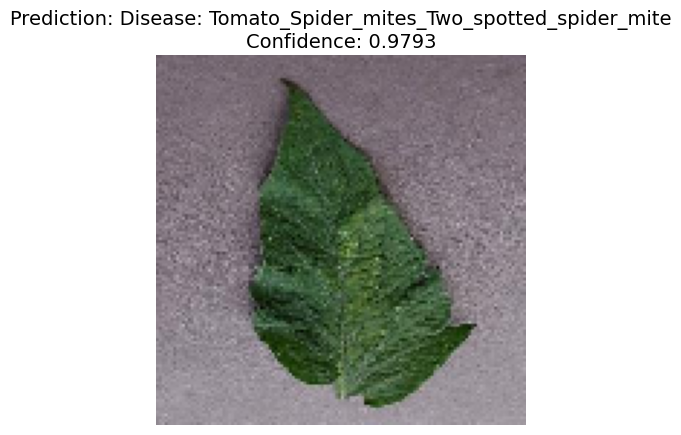

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


C:\Users\CompUser\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127811 (\N{LEAF FLUTTERING IN WIND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


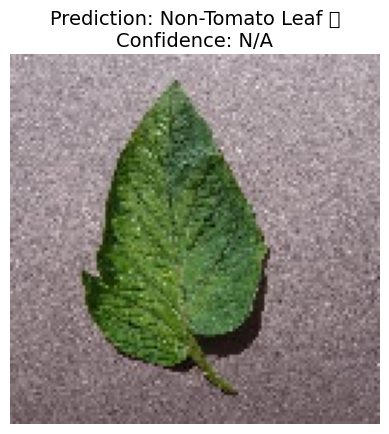

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


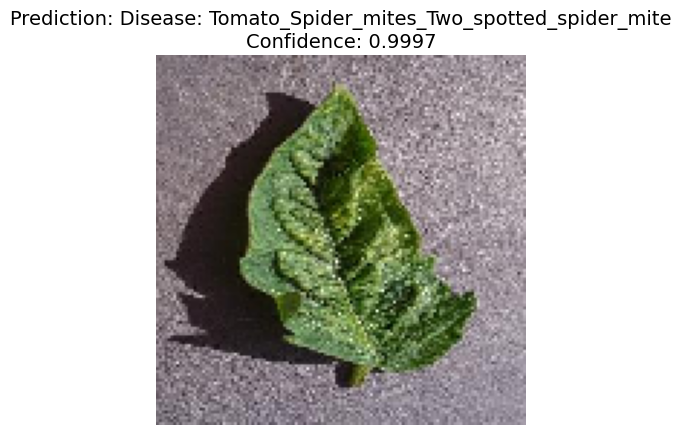

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


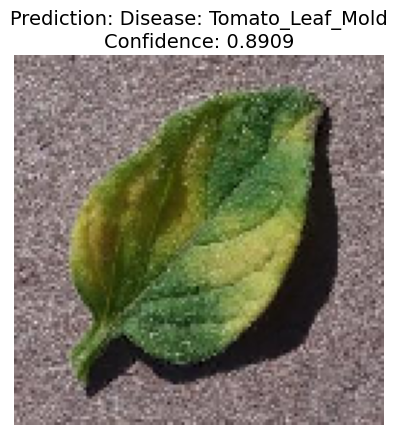

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


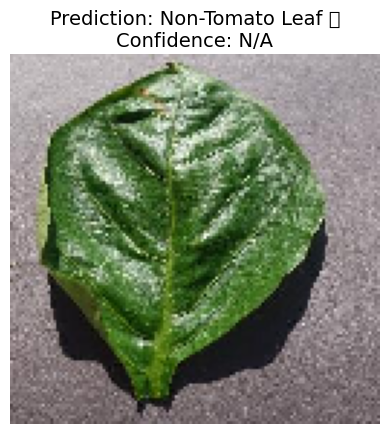

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


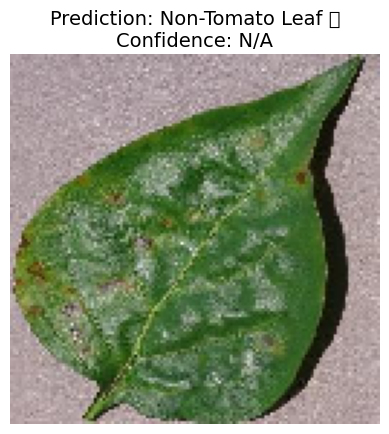

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


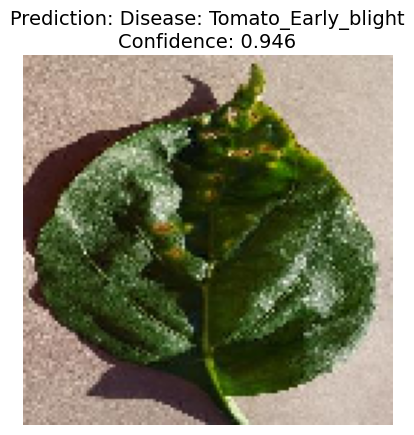

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


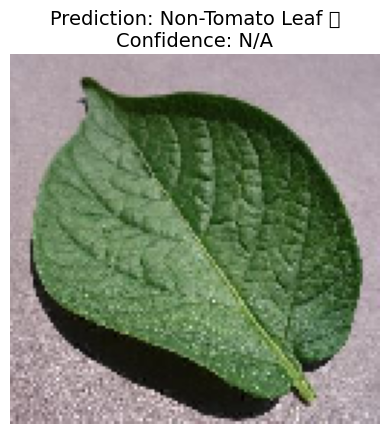

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


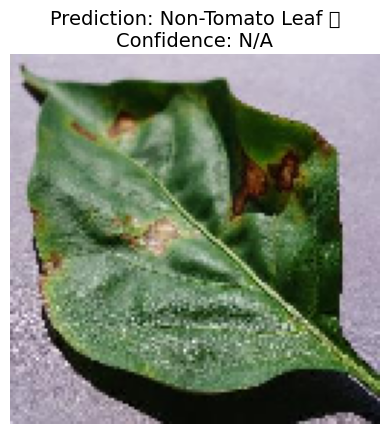

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


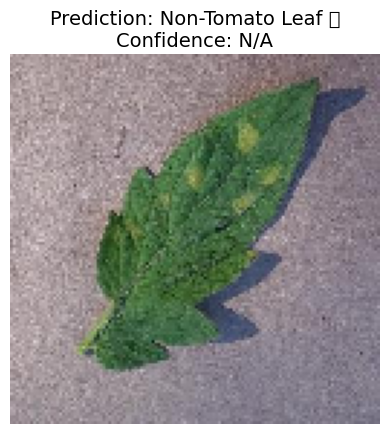

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


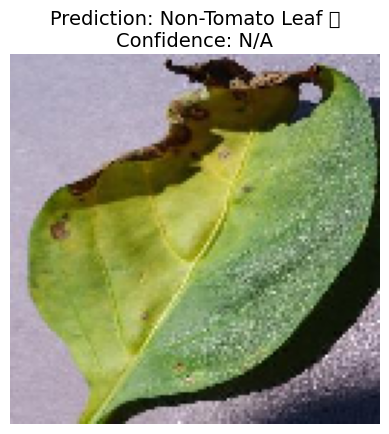

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


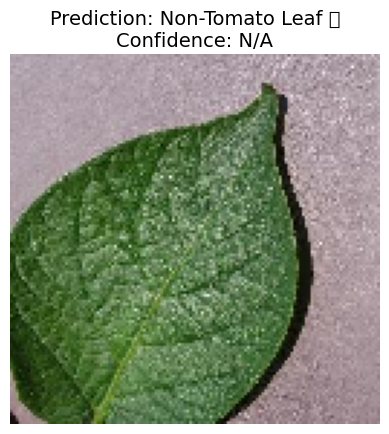

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


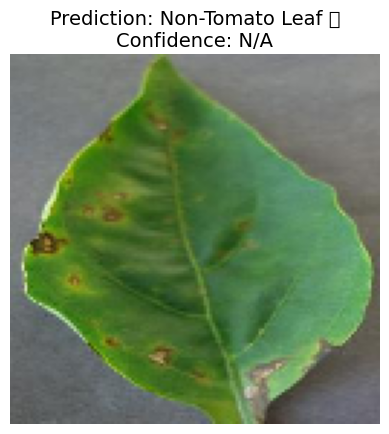

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


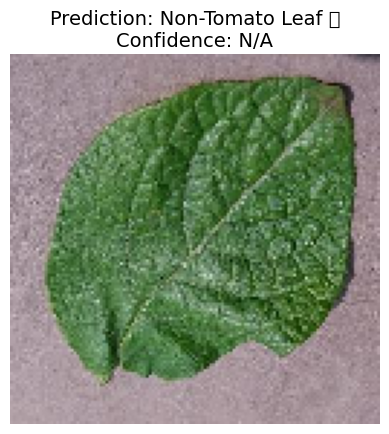

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


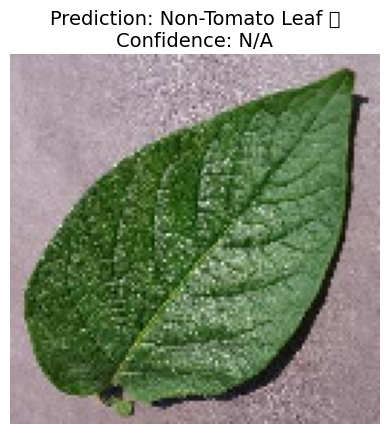

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


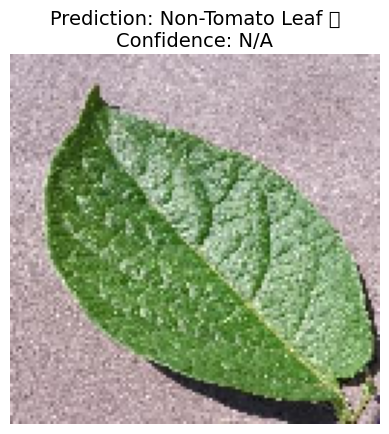

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


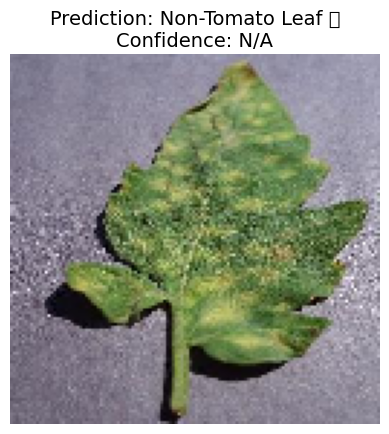

In [ ]:
import os

PREDICTION_DATA_SET = r"C:\Users\CompUser\Documents\GitHub\iCog-Task\tomato-leaf-disease-classification\dataset_prediction"

prediction_images = os.listdir(PREDICTION_DATA_SET)
prediction_images = [f for f in prediction_images if os.path.isfile(os.path.join(PREDICTION_DATA_SET, f))]
prediction_images = [os.path.join(PREDICTION_DATA_SET, f) for f in prediction_images]

for img in prediction_images:
    predict(img)

In [ ]:
# 